# 2. Perceptron Algorithm

## Higher Dimension Classification

Given a $n$-dimensional space with $n$ features $X = x_1, x_2, \ldots, x_n$, then our **boundary** is a $n-1$ dimensional **hyper-plane**

$$
W X + b = 0
$$

with the weights
$$
W = (w_1, w_2, \ldots, w_n)
$$

The **prediction** $\hat{y}$ is then

$$
\hat{y} =
\begin{cases}
  1 \quad \text{if} \quad WX+b \geq 0 \\
  0 \quad \text{if} \quad WX+b < 0
\end{cases}
$$

## Perceptron

A perceptron can be considered a **linear function** for the feature inputs (incl. the bias) and weights followed by a **step function**.

A **linear classifier** is a **dot product** (German: Skalarprodukt) of a **weight** vector $w$ and a **feature** vector $x$

$$
w^T x = \sum_j w_j x_j
$$

The **weight** vector can also be considered as the **normal** of the hypersurface

### Logical Operators as Perceptrons

TODO

### Perceptron Algorithm

Given $n$ observations $x_1, \dots, x_n$

1. start with random weights $w_1, \dots, w_n, b$
2. for each misclassified point $x_i$, set

$$
\begin{aligned}
w_i &\to 
\begin{cases}
  w_i + \alpha x_i \quad \text{if prediction = 0}\\
  w_i - \alpha x_i \quad \text{if prediction = 1}
\end{cases} \\
b &\to 
\begin{cases}
  b + \alpha \quad \text{if prediction = 0}\\
  b - \alpha \quad \text{if prediction = 1}
\end{cases}
\end{aligned}
$$


In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns

data = np.loadtxt('data/perceptron.csv', delimiter = ',')
X = data[:, :-1]
y = data[:, -1]

print(f'X is a matrix with shape {X.shape}')
print(f'y is a vector with shape {y.shape}')

X is a matrix with shape (100, 2)
y is a vector with shape (100,)


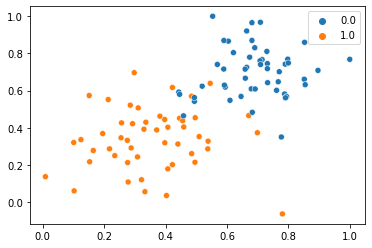

In [2]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

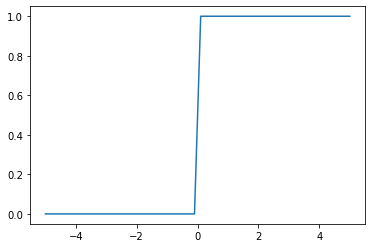

In [3]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

x = np.linspace(-5, 5)
plt.plot(x, [stepFunction(x) for x in x]);

In [4]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i] - y_hat == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
        elif y[i] - y_hat == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
    return W, b
    
def trainPerceptronAlgorithm(X, y, learn_rate, num_epochs):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [5]:
boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 50)

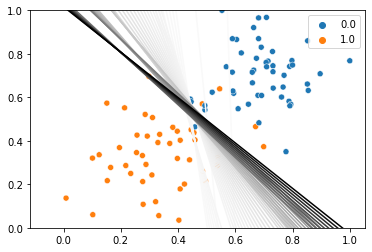

In [6]:
X_min = X.min()
X_max = X.max()
counter = len(boundary_lines)
plt.ylim(0,1)
for W, b in boundary_lines:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);